In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\harip\Dairy data Analysis"

In [4]:
# Importing the dataset
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Dairy data cleaned.csv'), index_col = 0)

In [5]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date recording date,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
0,Telangana,310.84,96,Medium,17/02/2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,2022,Low Sales,Moderately priced
1,Uttar Pradesh,19.19,44,Large,01/12/2021,1,Milk,Amul,687.48,42.61,...,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021,Moderate Sales,Moderately priced
2,Tamil Nadu,581.69,24,Medium,28/02/2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,2022,Low Sales,Moderately priced
3,Telangana,908.00,89,Small,09/06/2019,3,Cheese,Britannia Industries,823.36,26.52,...,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019,Low Sales,Low priced
4,Maharashtra,861.95,21,Medium,14/12/2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,2020,Low Sales,Moderately priced


# Data Cleaning

In [6]:
df.shape

(4325, 26)

In [7]:
# Check for missing values
df.isnull().sum()

States                                 0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size per sq.km                    0
Date recording date                    0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Overall Prices                         0
Total Value of products available      0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales categories                       0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
Year of recording data                 0
Sales           

No missing values seen

In [8]:
# Check for duplicates
dups = df.duplicated()

In [9]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
4320    False
4321    False
4322    False
4323    False
4324    False
Length: 4325, dtype: bool

No duplicates seen

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325 entries, 0 to 4324
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size per sq.km                  4325 non-null   object 
 4   Date recording date                  4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Overall Prices                       4325 non-null   float64
 10  Total Value of products available    4325 non-null   float64
 11  Shelf Life (days)             

In [11]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Overall Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820,2020.466358
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035,1.113822
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000,2019.000000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000,2019.000000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000,2020.000000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000,2021.000000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000,2022.000000


# Data preparation for Regression analysis

## Hypothesis 1: If the Price per Unit (sold) increases then the Approx. total revenue of the brands goes up.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Price per Unit (sold)'].values.reshape(-1,1)
y = df['Approx. Total Revenue(INR)'].values.reshape(-1,1)

In [13]:
X

array([[82.24],
       [39.24],
       [33.81],
       ...,
       [89.46],
       [10.56],
       [44.55]])

In [14]:
y

array([[5.756800e+02],
       [2.189592e+04],
       [8.655360e+03],
       ...,
       [1.261386e+04],
       [2.112000e+01],
       [1.857735e+04]])

In [15]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


## Regression analysis

In [16]:
# Create regression object
regression = LinearRegression()

In [17]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

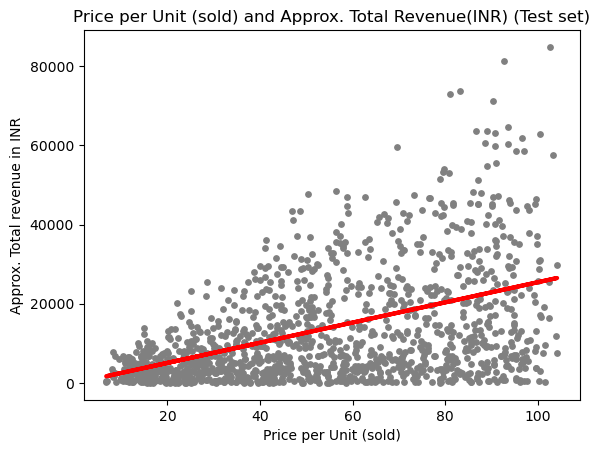

In [19]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price per Unit (sold) and Approx. Total Revenue(INR) (Test set)')
plot_test.xlabel('Price per Unit (sold)')
plot_test.ylabel('Approx. Total revenue in INR')
plot_test.show()

The Regression line here does fit with the data as it is showing the upward trend. But we could see many data points away from the line which is indicating there might be outliers.

In [20]:
# Check the slope, MSE and R2 score.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[254.67053883]]
Mean squared error:  151863034.5035039
R2 score:  0.17831116278645598


In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3879.42,3993.669102
1,31533.54,20155.061496
2,8778.24,4378.221616
3,435.58,3802.666198
4,5978.84,9318.830069
5,6407.70,20898.699470
6,29078.60,17651.650100
7,3728.95,11149.911243
8,2150.20,4189.765417
9,501.55,25523.516455


From the summary statistics, despite the slope showing a positive relationship and the regression line is in upward trend the model is still inaccurate as seeing the MSE and R2 value of 0.17 indicating a poor fit and the large MSE values are confirming it.

## Compare how the regression fits the training set

In [23]:
# Predict on the training set

y_predicted_train = regression.predict(X_train)

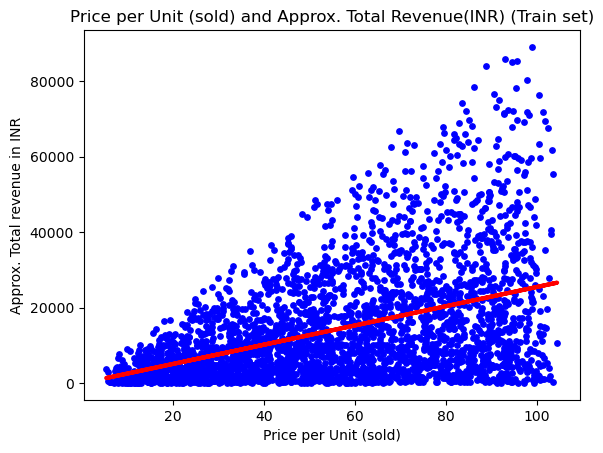

In [24]:
# Create a plot that shows the regression line from the model on the train set.
plot_test = plt
plot_test.scatter(X_train, y_train, color='Blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price per Unit (sold) and Approx. Total Revenue(INR) (Train set)')
plot_test.xlabel('Price per Unit (sold)')
plot_test.ylabel('Approx. Total revenue in INR')
plot_test.show()

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[254.67053883]]
Mean squared error:  181029548.1827251
R2 score:  0.19623282827047417


In [27]:
# Create a dataframe comparing the actual and predicted values of y_trained.

data_1 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,3879.42,3993.669102
1,31533.54,20155.061496
2,8778.24,4378.221616
3,435.58,3802.666198
4,5978.84,9318.830069
5,6407.70,20898.699470
6,29078.60,17651.650100
7,3728.95,11149.911243
8,2150.20,4189.765417
9,501.55,25523.516455


From the training set, the model outcomes are almost similar to the test set. But a slight increase is seen in the r2 values of 0.19. After, conforming with MSE values it proves that the price per unit (sold) is not a generating factor of the Approx. total revenue. But yes there might a slight relationship as the slope showing positive relationship.

## Hypothesis 2: If The quantities of the milk products(sold) increases the Overall sales increases.

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Quantity Sold (liters/kg)'].values.reshape(-1,1)
y = df['Approx. Total Revenue(INR)'].values.reshape(-1,1)

In [29]:
X

array([[  7],
       [558],
       [256],
       ...,
       [141],
       [  2],
       [417]], dtype=int64)

In [30]:
y

array([[5.756800e+02],
       [2.189592e+04],
       [8.655360e+03],
       ...,
       [1.261386e+04],
       [2.112000e+01],
       [1.857735e+04]])

In [31]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

### Regression Analysis

In [32]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

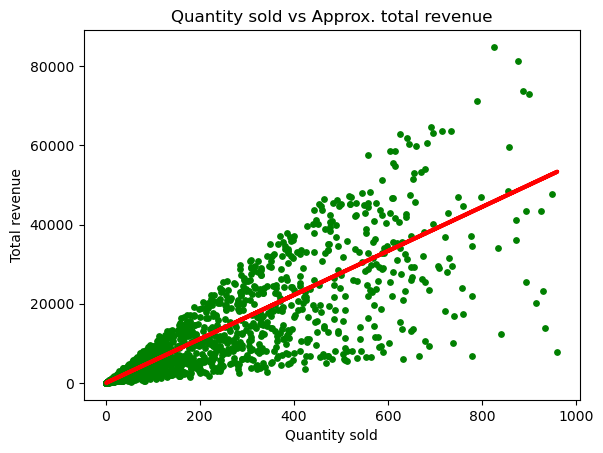

In [34]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Quantity sold vs Approx. total revenue')
plot_test.xlabel('Quantity sold')
plot_test.ylabel('Total revenue')
plot_test.show()

The Regression line here does fit with the data as it is showing the upward trend. It indicates that as the quantits sold goes up so as the total revenue.

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[55.55847748]]
Mean squared error:  181029548.1827251
R2 score:  0.19623282827047417


In [37]:
# Create a dataframe comparing the actual and predicted values of y_trained.

data1 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,3879.42,3993.669102
1,31533.54,20155.061496
2,8778.24,4378.221616
3,435.58,3802.666198
4,5978.84,9318.830069
5,6407.70,20898.699470
6,29078.60,17651.650100
7,3728.95,11149.911243
8,2150.20,4189.765417
9,501.55,25523.516455


This model is not a good fit as the MSE is very larger and the R2 value is in minus. The slope shows a positive trend because of which the regression line in plot showing the upward trend.

## Compare how the regression fits the training set

In [38]:
# Predict on the training set

y_predicted_train = regression.predict(X_train)

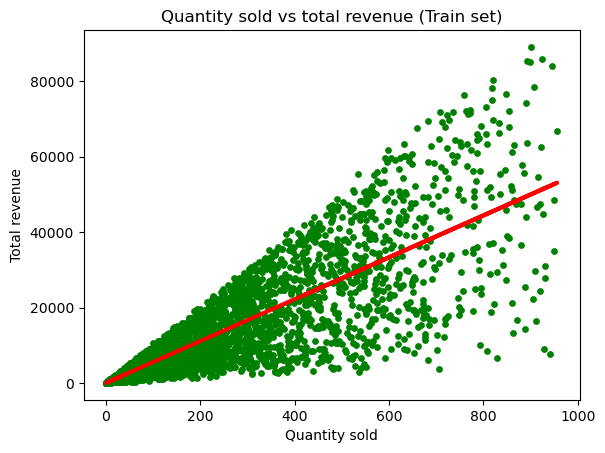

In [39]:
# Create a plot that shows the regression line from the model on the train set.
plot_test = plt
plot_test.scatter(X_train, y_train, color='Green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Quantity sold vs total revenue (Train set)')
plot_test.xlabel('Quantity sold')
plot_test.ylabel('Total revenue')
plot_test.show()

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[55.55847748]]
Mean squared error:  181029548.1827251
R2 score:  0.19623282827047417


There is no difference among the test and train set. From the above tests despite having a upward trend this model is not a good fit because of the values. Perhaps, there might be a slight relationship between the two variables but still we don't have any significant proof.

## Trying quantity sold in higher quantity above 400 liters

In [41]:
df_2 = df[df['Quantity Sold (liters/kg)']> 400]

In [42]:
df_2

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date recording date,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
1,Uttar Pradesh,19.19,44,Large,01/12/2021,1,Milk,Amul,687.48,42.61,...,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021,Moderate Sales,Moderately priced
3,Telangana,908.00,89,Small,09/06/2019,3,Cheese,Britannia Industries,823.36,26.52,...,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019,Low Sales,Low priced
6,Karnataka,73.28,74,Small,05/08/2022,3,Cheese,Dynamix Dairies,757.14,36.83,...,32.66,13390.60,Karnataka,Online,347,49.82,105.86,2022,Low Sales,Moderately priced
8,West Bengal,72.31,76,Medium,02/08/2020,6,Curd,Raj,949.12,22.79,...,24.77,21302.20,Jharkhand,Wholesale,89,85.71,32.03,2020,Moderate Sales,Low priced
14,Gujarat,182.28,70,Medium,10/04/2022,5,Ice Cream,Dodla Dairy,797.69,88.66,...,93.51,60313.95,Karnataka,Retail,152,83.86,144.30,2022,High Sales,Moderately priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,Kerala,664.18,77,Large,21/05/2020,4,Yogurt,Dodla Dairy,978.53,96.67,...,95.70,56367.30,Bihar,Wholesale,389,95.08,106.34,2020,Moderate Sales,Moderately priced
4301,Bihar,503.33,50,Small,01/01/2020,3,Cheese,Passion Cheese,804.03,98.39,...,93.85,46080.35,Chandigarh,Retail,313,16.86,79.55,2020,Moderate Sales,Moderately priced
4311,Madhya Pradesh,997.26,73,Medium,04/09/2020,3,Cheese,Passion Cheese,702.36,37.63,...,32.97,13352.85,Karnataka,Online,297,89.29,108.11,2020,Low Sales,Moderately priced
4316,Telangana,449.88,28,Small,05/01/2021,8,Buttermilk,Amul,877.57,83.56,...,84.48,72230.40,Gujarat,Retail,22,34.43,54.45,2021,High Sales,Moderately priced


In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['Quantity Sold (liters/kg)'].values.reshape(-1,1)
y = df_2['Approx. Total Revenue(INR)'].values.reshape(-1,1)

In [44]:
X

array([[558],
       [601],
       [410],
       [860],
       [645],
       [778],
       [438],
       [486],
       [610],
       [845],
       [557],
       [671],
       [715],
       [406],
       [552],
       [705],
       [956],
       [634],
       [696],
       [534],
       [834],
       [420],
       [869],
       [499],
       [490],
       [458],
       [465],
       [581],
       [556],
       [674],
       [597],
       [552],
       [779],
       [459],
       [554],
       [463],
       [467],
       [505],
       [480],
       [637],
       [578],
       [568],
       [476],
       [522],
       [402],
       [805],
       [435],
       [726],
       [631],
       [637],
       [526],
       [509],
       [471],
       [672],
       [766],
       [728],
       [485],
       [658],
       [494],
       [488],
       [518],
       [708],
       [424],
       [605],
       [625],
       [443],
       [636],
       [539],
       [849],
       [578],
       [545],
      

In [45]:
y

array([[21895.92],
       [17380.92],
       [13390.6 ],
       [21302.2 ],
       [60313.95],
       [ 6760.82],
       [23122.02],
       [46694.88],
       [55540.5 ],
       [56361.5 ],
       [45540.32],
       [22089.32],
       [63692.2 ],
       [11051.32],
       [41096.4 ],
       [31753.2 ],
       [66719.24],
       [60287.06],
       [58276.08],
       [25637.34],
       [34168.98],
       [20214.6 ],
       [47569.06],
       [24021.86],
       [39871.3 ],
       [ 5889.88],
       [13857.  ],
       [28689.78],
       [29885.  ],
       [18265.4 ],
       [61783.53],
       [43265.76],
       [46856.85],
       [16840.71],
       [ 8598.08],
       [ 7644.13],
       [37182.54],
       [ 7383.1 ],
       [47136.  ],
       [32646.25],
       [19322.54],
       [24901.12],
       [15641.36],
       [20639.88],
       [17133.24],
       [73295.25],
       [21536.85],
       [43937.52],
       [63383.95],
       [23205.91],
       [25984.4 ],
       [21968.44],
       [ 600

In [46]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

## Regression Analysis

In [47]:
# Create regression object
regression = LinearRegression()

In [48]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

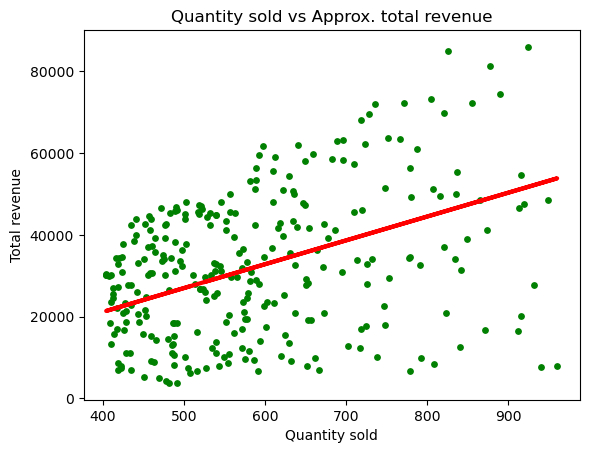

In [50]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Quantity sold vs Approx. total revenue')
plot_test.xlabel('Quantity sold')
plot_test.ylabel('Total revenue')
plot_test.show()

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[58.2852804]]
Mean squared error:  181029548.1827251
R2 score:  0.19623282827047417


## Testing with training set

In [52]:
# Predict on the training set

y_predicted_train = regression.predict(X_train)

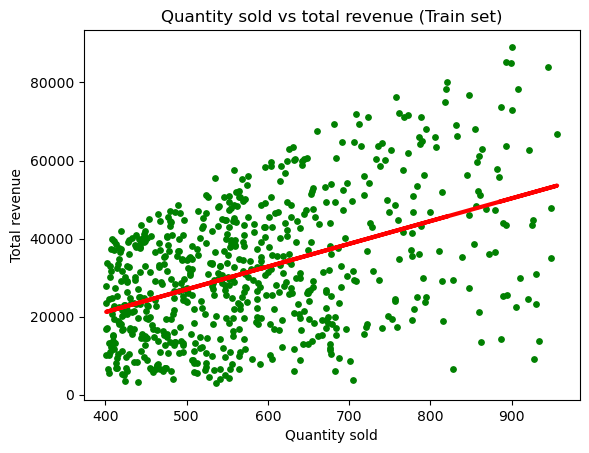

In [53]:
# Create a plot that shows the regression line from the model on the train set.
plot_test = plt
plot_test.scatter(X_train, y_train, color='Green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Quantity sold vs total revenue (Train set)')
plot_test.xlabel('Quantity sold')
plot_test.ylabel('Total revenue')
plot_test.show()

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[58.2852804]]
Mean squared error:  181029548.1827251
R2 score:  0.19623282827047417


Even after filtering the data, the model still doesn't show a good fit as the the values of slope, MSE and R2 values remains the same as the orginal set.